In [ ]:
###Returns

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 

In [3]:
ticker = "TSLA"
df = yf.download(ticker, start="2024-01-01", end="2026-01-01")
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
2024-01-05,237.490005,240.119995,234.899994,236.860001,92488900
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


In [6]:
prices = df["Close"].dropna()
prices.head()

Ticker,TSLA
Date,
2024-01-02,248.419998
2024-01-03,238.449997
2024-01-04,237.929993
2024-01-05,237.490005
2024-01-08,240.449997


In [ ]:
log_returns = np.log(prices / prices.shift(1)).dropna()
log_returns.head()

# log_5d = np.log(prices / prices.shift(5)) for a 5 day return

Ticker,TSLA
Date,
2024-01-03,-0.040961
2024-01-04,-0.002183
2024-01-05,-0.001851
2024-01-08,0.012387
2024-01-09,-0.023097


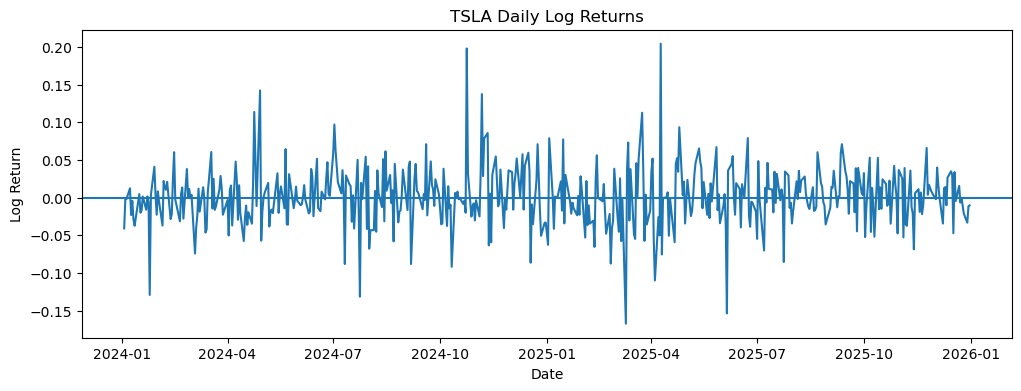

In [8]:
plt.figure(figsize=(12,4))
plt.plot(log_returns)
plt.title(f"{ticker} Daily Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.axhline(0)  # zero line
plt.show()

**Volatility

In [13]:
daily_vol = log_returns.std()
annual_vol = daily_vol * np.sqrt(252)


In [14]:
# Example: 21-day rolling vol (approx 1 month)

rolling_vol = log_returns.rolling(21).std()
rolling_annual_vol = rolling_vol * np.sqrt(252)

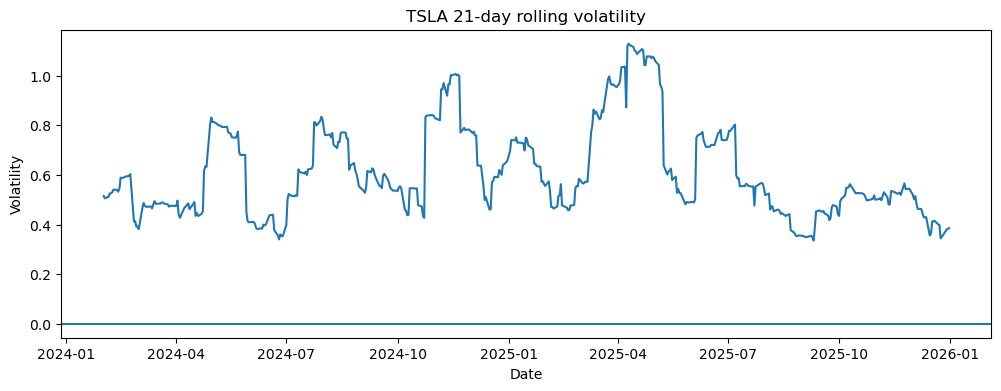

In [16]:
plt.figure(figsize=(12,4))
plt.plot(rolling_annual_vol)
plt.title(f"{ticker} 21-day rolling volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.axhline(0)  # zero line
plt.show()